# From scratch deep learning model

In [156]:
import pandas as pd
import numpy as np
import torch
from torch import tensor
from fastai.data.transforms import RandomSplitter
import torch.nn.functional as F
import tensorflow as tf
import matplotlib.pyplot as plt

In [157]:
file = 'superstore_data.csv'
df = pd.read_csv(file)

In [158]:
# Checking the amount of NaN values for each column
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [159]:
# Replacing all NaN values with the mode values of the dataset
modes = df.mode().iloc[0]
df.fillna(modes, inplace=True)
modes

Id                              0
Year_Birth                 1976.0
Education              Graduation
Marital_Status            Married
Income                     7500.0
Kidhome                       0.0
Teenhome                      0.0
Dt_Customer             8/31/2012
Recency                      56.0
MntWines                      2.0
MntFruits                     0.0
MntMeatProducts               7.0
MntFishProducts               0.0
MntSweetProducts              0.0
MntGoldProds                  1.0
NumDealsPurchases             1.0
NumWebPurchases               2.0
NumCatalogPurchases           0.0
NumStorePurchases             3.0
NumWebVisitsMonth             7.0
Response                      0.0
Complain                      0.0
Name: 0, dtype: object

In [160]:
df.describe(include=(np.number))

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   51767.816518     0.444196     0.506250   
std     3246.662198    11.984069   25458.285477     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   34722.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51075.000000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [161]:
# Scaling the variables that have long tail distributions to have more even distributions 
# Prevents larger values from having more of an influence than smaller values
df['Income'] = np.log(df['Income'] + 1)
df['MntWines'] = np.log(df['MntWines'] + 1)
df['MntFruits'] = np.log(df['MntFruits'] + 1)
df['MntMeatProducts'] = np.log(df['MntMeatProducts'] + 1)
df['MntFishProducts'] = np.log(df['MntFishProducts'] + 1)
df['MntSweetProducts'] = np.log(df['MntSweetProducts'] + 1)
df['MntGoldProds'] = np.log(df['MntGoldProds'] + 1)
df['NumDealsPurchases'] = np.log(df['NumDealsPurchases'] + 1)

In [162]:
# Creating a PyTorch tensor for the dependent variable
t_dep = tensor(df.Response)


indep_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
              'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']
# Creating a PyTorch tensor for the independent variables
t_indep = tensor(df[indep_cols].values, dtype=torch.float)

In [163]:
# The amount of independent variables
n_coeff = t_indep.shape[1]

In [164]:
# Scaling the independent variables to range from 0 to 1 for consistency 
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [165]:
# Splitting the data into training and validation sets
# Using seed 42 for reproducibility 
trn_split, val_split=RandomSplitter(seed=42)(df)

train_indep, val_indep = t_indep[trn_split], t_indep[val_split]
train_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(train_indep), len(val_indep)

(1792, 448)

In [166]:
# Initializes the coefficients
def init_coeffs():
  # Creates a network of 5 layers: 1 input layer, 3 hidden layers, and 1 output layer
  hiddens = [64,64,64]
  sizes = [n_coeff] + hiddens + [1]
  n = len(sizes)
  # Creates random coefficients for each layer and random constant terms
  layers = [(torch.rand(sizes[i], sizes[i+1])-0.2)/sizes[i+1]*4 for i in range(n-1)]
  consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
  # Returns the layers with constant terms and gradient attributes added
  for l in layers + consts:
    l.requires_grad_()
  return layers, consts

In [167]:
# Calculates the predictions
def calc_preds(coeffs, indeps):
  # Takes in the coefficients which is a tuple of the layer coefficients and constants
  layers, consts = coeffs
  n = len(layers)
  res = indeps
  # Applying a matrix multiplication of the layer coefficients and the values of the independent variables
  for i, l in enumerate(layers):
    res = res@l + consts[i]
    # Applies activation functions to each layer 
    if i != n-1:
      res = F.relu(res)
  return torch.sigmoid(res)

In [168]:
# Calculates the loss using mean average error 
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [169]:
# Updates the coefficients by adding the gradients by the learning rate 
def update_coeffs(coeffs, lr):
  layers, consts = coeffs
  for layer in layers+consts:
    layer.sub_(layer.grad * lr)
    layer.grad.zero_()

In [170]:
# Calculates the average accuracy of the predictions
# If the prediction was >0.5, it means the response was yes and if it was <0.5, then the response was no
def acc(coeffs):
  return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

In [171]:
# Runs one epoch of training
# Calculates the loss, adjusts coefficients, and returns the loss
accuracies = []
def one_epoch(coeffs, lr):
  
  loss = calc_loss(coeffs, train_indep, train_dep)
  loss.backward()
  with torch.no_grad(): update_coeffs(coeffs, lr)

  accuracy = float(acc(coeffs).detach().numpy())
  accuracies.append(accuracy)
  
  print(f"{loss}", end=";")
  print(lr)
  return float(loss.detach().numpy())

In [172]:
losses = []

# Training loop that takes in the number of epochs and the default learning rate
# As each epoch runs, the learning rate decreases by 15% if the loss doesn't decrease by at least 0.01
def train_model(epochs=30, lr=0.01):
  torch.manual_seed(442)
  coeffs = init_coeffs()
  for i in range(epochs):
    loss = one_epoch(coeffs, lr=lr)
    if losses:
      if losses[-1] - loss < 0.01:
        lr -= lr*.15
    losses.append(loss)
  return coeffs

In [173]:
coeffs = train_model(lr=30)

0.8498857617378235;30
0.8498682379722595;30
0.5746482610702515;25.5
0.16476848721504211;25.5
0.16034264862537384;25.5
0.15804965794086456;21.675
0.1568199098110199;18.423750000000002
0.1560535877943039;15.660187500000001
0.15553390979766846;13.311159375
0.15516187250614166;11.31448546875
0.1548852175474167;9.6173126484375
0.15467387437820435;8.174715751171874
0.15450897812843323;6.9485083884960925
0.1543782502412796;5.906232130221679
0.15427334606647491;5.020297310688427
0.15418829023838043;4.2672527140851635
0.15411876142024994;3.627164806972389
0.15406164526939392;3.0830900859265307
0.15401431918144226;2.6206265730375513
0.15397509932518005;2.2275325870819187
0.15394236147403717;1.8934026990196309
0.1539149433374405;1.6093922941666863
0.15389201045036316;1.3679834500416834
0.15387269854545593;1.1627859325354308
0.15385647118091583;0.9883680426551162
0.15384282171726227;0.8401128362568488
0.15383124351501465;0.7140959108183216
0.1538214534521103;0.6069815241955734
0.1538132280111313;0

In [174]:
losses

[0.8498857617378235,
 0.8498682379722595,
 0.5746482610702515,
 0.16476848721504211,
 0.16034264862537384,
 0.15804965794086456,
 0.1568199098110199,
 0.1560535877943039,
 0.15553390979766846,
 0.15516187250614166,
 0.1548852175474167,
 0.15467387437820435,
 0.15450897812843323,
 0.1543782502412796,
 0.15427334606647491,
 0.15418829023838043,
 0.15411876142024994,
 0.15406164526939392,
 0.15401431918144226,
 0.15397509932518005,
 0.15394236147403717,
 0.1539149433374405,
 0.15389201045036316,
 0.15387269854545593,
 0.15385647118091583,
 0.15384282171726227,
 0.15383124351501465,
 0.1538214534521103,
 0.1538132280111313,
 0.15380622446537018]

In [175]:
accuracies

[0.1450892835855484,
 0.1450892835855484,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128,
 0.8549107313156128]

In [176]:
acc(coeffs)

tensor(0.8549)

In [177]:
# Setting up matplotlib graph settings
plt.style.use('fivethirtyeight')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

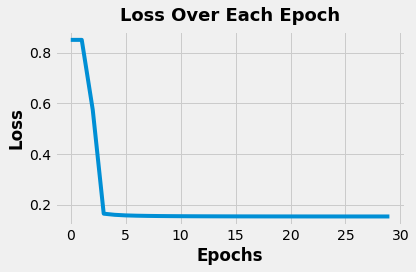

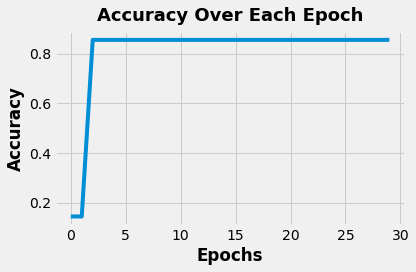

In [178]:
plt.plot(list(range(len(losses))), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Each Epoch")
plt.show()

plt.plot(list(range(len(accuracies))), accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Each Epoch")
plt.show()

# Results
After testing multiple different learning rates, layer amounts, and optimization methods, the model seemed to max out at about 85% accuracy with a loss of 0.15. The stagnation in accuracy seems to be caused by the manual testing of parameters, rather than having pre-built optimizers adjust them accordingly. 

# Model made from pre-built architectures

In [179]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [180]:
X_train, X_test, y_train, y_test = train_test_split(df[indep_cols], df['Response'], stratify=df['Response'], train_size=0.75)

transformer_num = make_pipeline(
    StandardScaler(),
)

preprocessor = make_column_transformer(
    (transformer_num, indep_cols),
)

# Standardizing the independent variables
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initializing a sequential model with 4 Dense layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[n_coeff]),
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [181]:
# Specifying how to optimize the model and how to calculate the loss and accuracy
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [182]:
# Adding an early stopping function that stops the model if there hasn't been a 0.001 decrease in the loss after 5 epochs
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

# Running the model with 1000 epochs and batch sizes of 512
history = model.fit(
    X_train, y_train,
    validation_data=(X_train, y_train),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose = 0
)

binary_accuracy        0.988095
val_binary_accuracy    0.989881
dtype: float64
loss        0.050194
val_loss    0.049270
dtype: float64


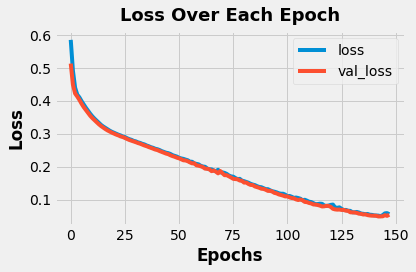

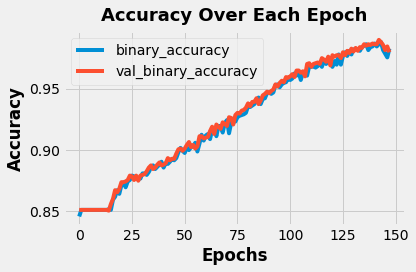

In [184]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(xlabel="Epochs", ylabel="Loss", title="Loss Over Each Epoch")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(xlabel="Epochs", ylabel="Accuracy", title="Accuracy Over Each Epoch")

print(history_df[['binary_accuracy', 'val_binary_accuracy']].max())
print(history_df[['loss', 'val_loss']].min())

# Results
After running both models, it was clear that the model with pre-built architectures performed better. It achieved a 99% accuracy, compared to the other model which achieved an 85% accuracy. I believe this was because a lot of the parameter testing and optimizing was done manually on the from-scratch model, compared to the other model which used a pre-built optimizer that could adjust values accordingly. 

In order to try and mimic the results of the pre-built model, I copied parts of the model architecture and applied it to the from-scratch model. One of the parts was the layer architecture, in the pre-built model I had 4 layers with 64 units (neurons), so I did the same in the from-scratch model. Another thing I added was the learning rate adjuster, which wasn't in the pre-built model, however I decided that it would be more useful to have that than to have an early callback function since the loss stayed stagnant most of the time. 

Having done all this, the accuracy was the same which leads me to believe that my hypothesis of the pre-built optimizer being the biggest influence on results was correct. 